In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keplersplinev2 import *

In [2]:
#Make a fake light curve with a transit
t = np.linspace(0, 20, 1000)
tno = np.copy(t)
t[200:] = t[200:] + 4
f = 0.02 * np.sin(2 * np.pi * t / (13.4)) + np.random.normal(1, 0.003, len(t)) -0.05 * np.sin(2 * np.pi * t / (38.4))
f[600:620] = f[600:620] - 0.05

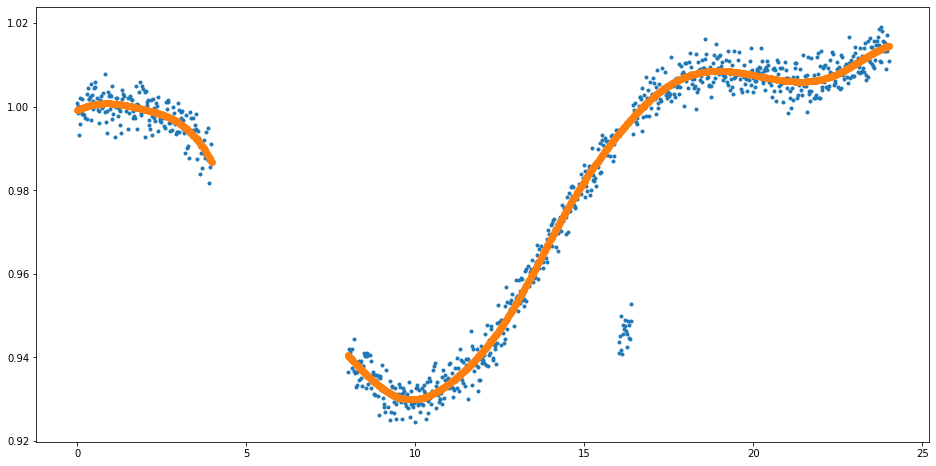

In [3]:
#Calculate a keplerspline with the default bkspacing of 1.5 days between knots: 

s = keplersplinev2(t, f)
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(t, f,'.')
plt.plot(t, s,'o')


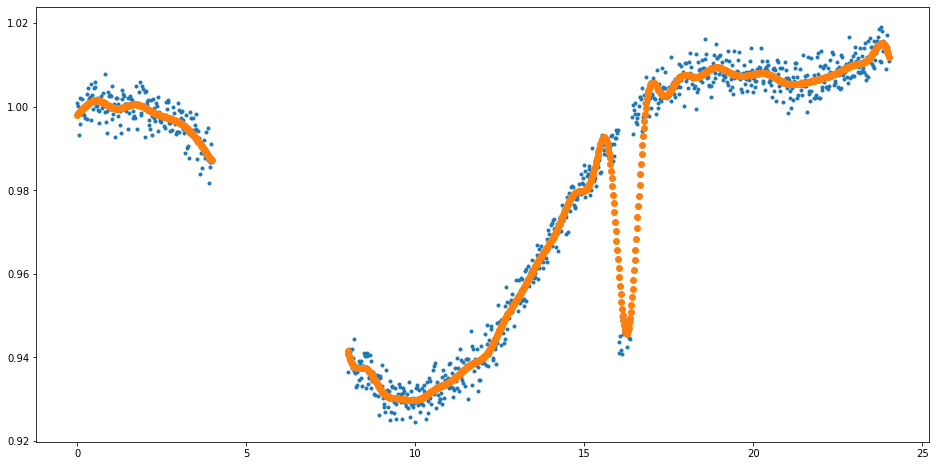

In [4]:
#If we want a more aggressive spline, we can use a smaller value for bkspace, but in this case it eats the transit: 
s = keplersplinev2(t, f, bkspace = 0.5)
fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(t, f,'.')
plt.plot(t, s,'o')


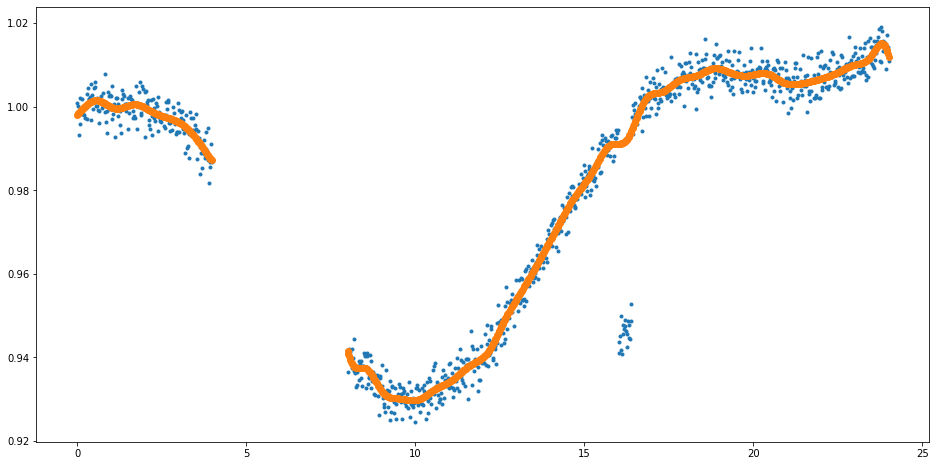

In [5]:
#So let's create a mask. It's just an array of True/False values, where "True" means "use this point in the fit", 
#and "False" means "Ignore this point"
input_mask = np.ones_like(t, dtype=bool)
input_mask[595:625] = False

smasked = keplersplinev2(t, f, input_mask = input_mask, bkspace = 0.5)

fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(t, f,'.')
plt.plot(t, smasked,'o')


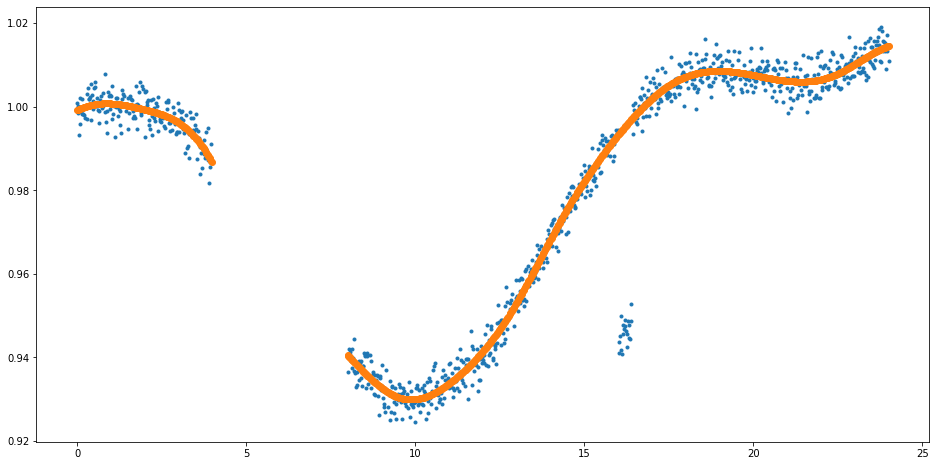

In [6]:
#We can also use the return_metadata=True tag in keplersplinev2
input_mask = np.ones_like(t, dtype=bool)
input_mask[595:625] = False

smasked, metadata = keplersplinev2(t, f, input_mask = input_mask, bkspace = 1.5, return_metadata=True)

fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(t, f,'.')
plt.plot(t, smasked,'o')

In [26]:
#Metadata has the following attributes: 
#      metadata.light_curve_mask = light_curve_mask
#      metadata.input_light_curve_mask = all_input_mask
#      metadata.bkspace = bkspace
#      metadata.likelihood_term = likelihood_term
#      metadata.penalty_term = penalty_term
#      metadata.bic = bic
print(metadata.bkspace)

1.5


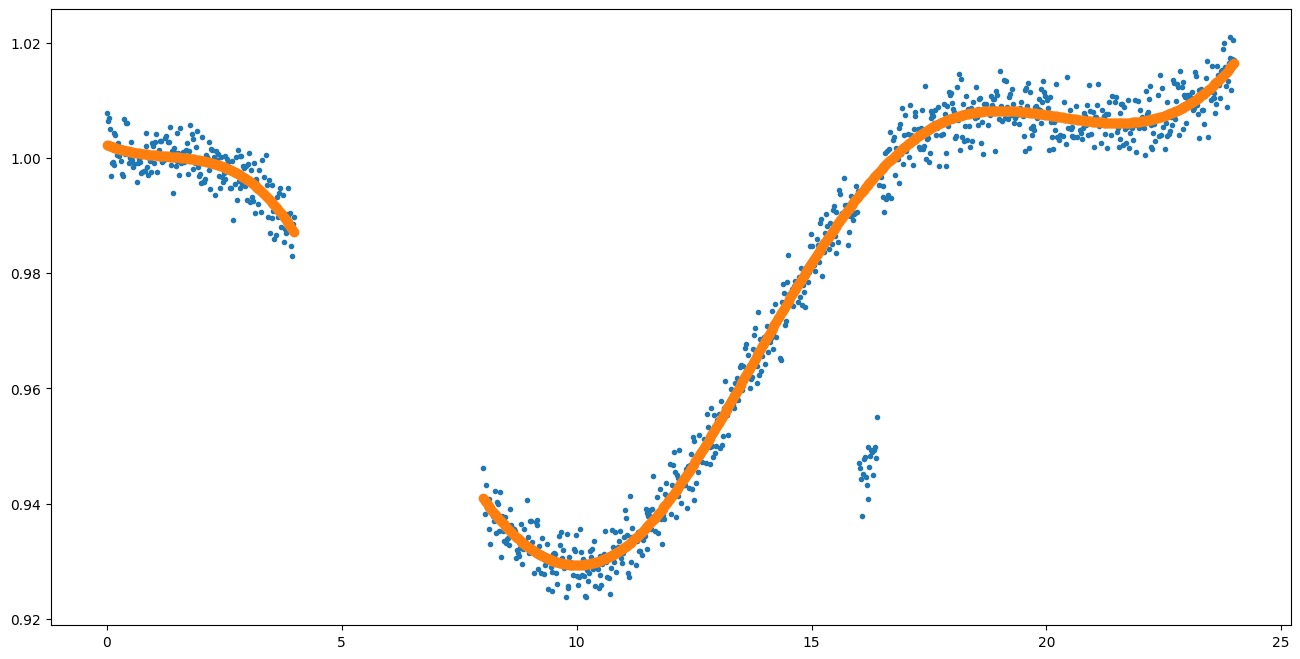

In [27]:
#You can also ask keplerspline to choose the best bkspace value using choosekeplersplinev2

s, metadata = choosekeplersplinev2(t, f, return_metadata=True)

fig, ax = plt.subplots(figsize=(16, 8))

plt.plot(t, f,'.')
plt.plot(t, s,'o')


In [14]:
#To find out which bkspace choosekeplersplinev2 chose, grab the metadata
print(metadata.bkspace)

2.8697266214624606


In [15]:
pip install pydl

Note: you may need to restart the kernel to use updated packages.


In [22]:
np.version.version

'1.26.4'